## Simulating a markov chain

### Importing libraries

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.style.use("science")
import math
import matplotlib as mpl
from random import shuffle
import pandas as pd
import networkx as nx
np.random.seed = 123

### Discrete time Markov Chain

Let

- $Z_1, Z_2, Z_3, ...$ be a sequence of random variables

The process $\{Z_1, Z_2, Z_3, ...\}$ is a markov chain iif the future of the chain is determined only by its present 

$$
Pr(Z_n = i_n / Z_{n-1}=i_{n-1}, ..., Z_0 = i_0) = Pr(Z_n = i_n / Z_{n-1} = i_{n-1})
$$

### Simulating a Markov Chain

We can simulate a markov chain by the following algorithm

- Draw $Z_0 \sim \mu_0$ such that $P(Z_o = i) = \mu_0(i)$
- Draw $Z_1 \sim P$ such that $P(Z_1 = j / Z_0 = i) = p_{ij}$
and so on

In [2]:
def simulate_markov_chain(mu_0:np.array, P:np.matrix, size:int):
    markov_chain = []
    # Number of states
    N = mu_0.size
    # States of the chain
    states = list(range(N))
    # Sample z0 initial state
    z0 = np.random.choice(states, p = mu_0)
    # Add z0 to the chain
    markov_chain.append(z0)
    for n in range(2, size):
        # Value of the current stats z_n
        zn = markov_chain[-1]
        # Sample the value of the next state z_n+1
        next = np.random.choice(states, p = P[zn, :])
        # Add the sampled value to the chain
        markov_chain.append(next)
    # Return the simulated chain
    return markov_chain

**Initial distribution of a random walker**

In [3]:
n = 10
mu_0 = np.repeat(1., n) / n
mu_0

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

**Transition probability matrix**

$$
P = (p_{i,j})
$$
with
$$
p_{i,j} = Pr(Z_n = j / Z_{n-1} = i)
$$

In [4]:
P = np.zeros((n, n))
P[0, 1] = 1
P[n - 1, n - 2] = 1
for i in range(1, n-1):
    P[i, i+1] = 0.5
    P[i, i-1] = 0.5
P

array([[0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

We can check that every row of P satisfy $\sum_j Z ̣{ij} = 1$

In [5]:
P.sum(1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Graph**

In [6]:
g = nx.DiGraph()

In [7]:
nodes = [str(_i) for _i in list(range(n))]

In [8]:
for node in nodes:
    g.add_node(node)

In [9]:
for i in range(n):
    for j in range(n):
        if P[i,j] > 0.:
            g.add_edge(nodes[i], nodes[j], weigths=P[i,j])
            g.add_edge(nodes[j], nodes[i], weigths=P[i,j])

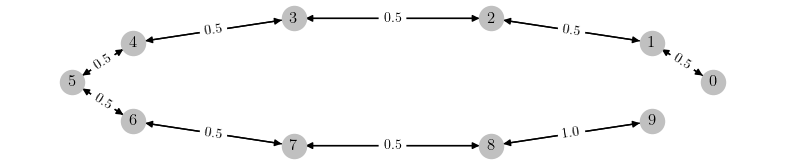

In [10]:
fig, ax = plt.subplots(figsize=(10, 2))
pos = nx.circular_layout(g)
nx.draw_networkx_nodes(g, pos, nodes, node_color = "silver")
nx.draw_networkx_edges(g, pos)
edge_labels = nx.get_edge_attributes(g, "weigths")
nx.draw_networkx_edge_labels(g, pos, edge_labels)
nx.draw_networkx_labels(g, pos)
plt.axis("off")
plt.show()

### n-transition matrix

The n-transition matrix is the matrix
$$
P_n = P * P .... * P = P^n 
$$

In [11]:
def n_transition_matrix(P:np.array, n):
    return P**n

$P^{(5)} = (p_{ij}) = P^{5}$ is 5-step transition matrix.

$p^{(5)}_{ij}$ is the probability of going from i to j in 5 steps.

In [12]:
P5 = n_transition_matrix(P, 5)
P5

array([[0.     , 1.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.03125, 0.     , 0.03125, 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.03125, 0.     , 0.03125, 0.     , 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.03125, 0.     , 0.03125, 0.     , 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.03125, 0.     , 0.03125, 0.     ,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.03125, 0.     , 0.03125,
        0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.03125, 0.     ,
        0.03125, 0.     , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.03125,
        0.     , 0.03125, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.03125, 0.     , 0.03125],
       [0.     , 0.     , 0.     , 0.

### Convergence of P

In [13]:
m = 7
Pn = [P**n for n in range(1, m + 1)]

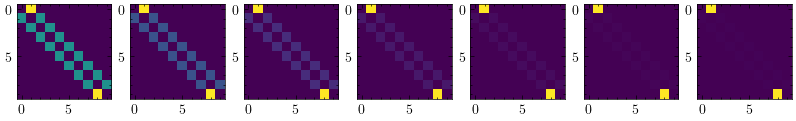

In [14]:
fig, axes = plt.subplots(1, m, figsize=(10, 10))
for i in range(m):
    axes[i].imshow(Pn[i])
plt.show()

P converge to the following matrix

In [15]:
Pstar = P**100
Pstar[Pstar <= 1e-3] = 0.
Pstar

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

**Marginal probabilities**

$$
\mu_n = \mu_0 P^n
$$

In [16]:
# Marginal pronabilities when n->infty
mu_0 @ Pstar

array([0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. ])

**Simulate the chain**

In [17]:
s = simulate_markov_chain(mu_0, P, 100)

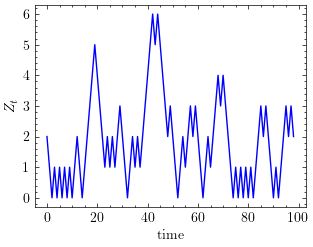

In [18]:
plt.plot(s, color = "blue")
plt.xlabel("time")
plt.ylabel(r"$Z_t$")
plt.show()

**Simulate multiple chains**

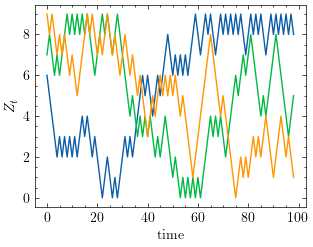

In [19]:
n_chains = 3
size = 10000
for i in range(n_chains):
    plt.plot(simulate_markov_chain(mu_0, P, 100))
plt.xlabel("time")
plt.ylabel(r"$Z_t$")
plt.show()